<span style="font-family: monospace; font-weight:600; font-size:125%;color:#3e252d;">Cluster Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')  

data = pd.read_csv('online_shoppers_intention.csv') 
data.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
# Labeling data. 
data['Month'] = LabelEncoder().fit_transform(data['Month'])  
data['VisitorType'] = LabelEncoder().fit_transform(data['VisitorType'])  
data['Weekend'] = LabelEncoder().fit_transform(data['Weekend'])  
data['Revenue'] = LabelEncoder().fit_transform(data['Revenue'])  
# Normalising the duration columns. 
scalar_col = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'] 
data[scalar_col] = StandardScaler().fit_transform(data[scalar_col])   

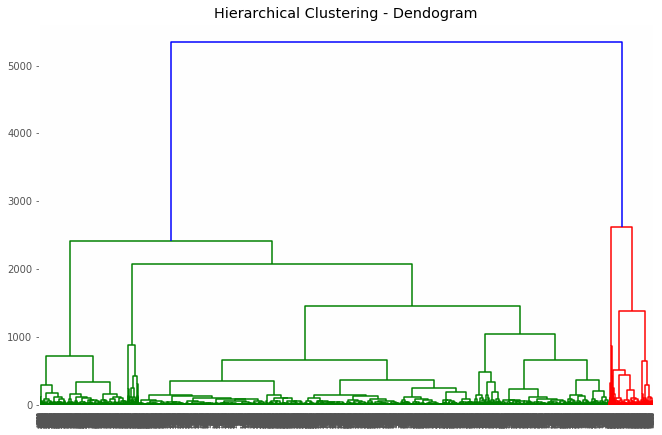

In [3]:
# dendogram for Revenue = True
import scipy.cluster.hierarchy as shc 

plt.figure(figsize = (11,7)) 
plt.title('Hierarchical Clustering - Dendogram') 
den = shc.dendrogram(shc.linkage(data.drop('Revenue', axis = 1), method = 'ward'))  

In [4]:
from sklearn.cluster import AgglomerativeClustering 
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data.drop('Revenue', axis = 1))  

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<span style="font-family: monospace; font-weight:400; font-size:100%;color:#3e252d;">Administrative Duration VS Page Values

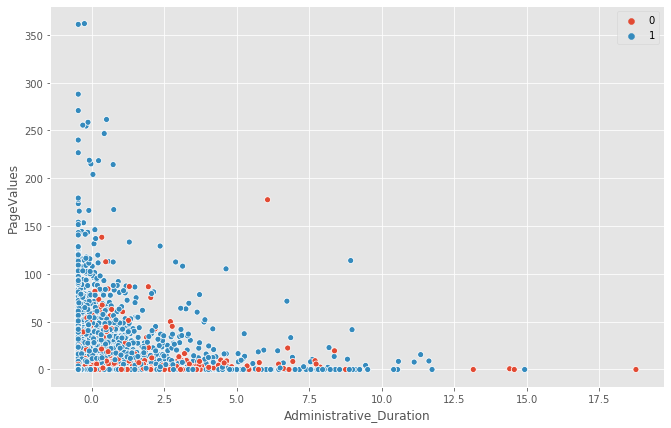

In [5]:
plt.figure(figsize = (11,7)) 
sns.scatterplot(data.Administrative_Duration, data.PageValues, hue = cluster.labels_); 

<span style="font-family: monospace; font-weight:400; font-size:100%;color:#3e252d;">Information Duration VS Page Values

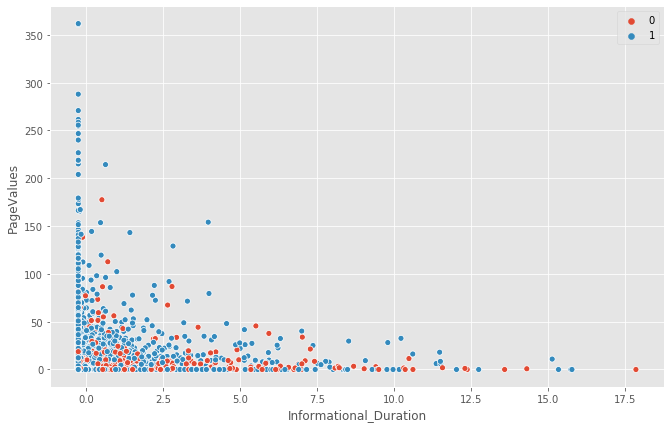

In [6]:
plt.figure(figsize = (11,7)) 
sns.scatterplot(data.Informational_Duration, data.PageValues, hue = cluster.labels_); 

<span style="font-family: monospace; font-weight:400; font-size:100%;color:#3e252d;">Product Related Duration VS Page Values 

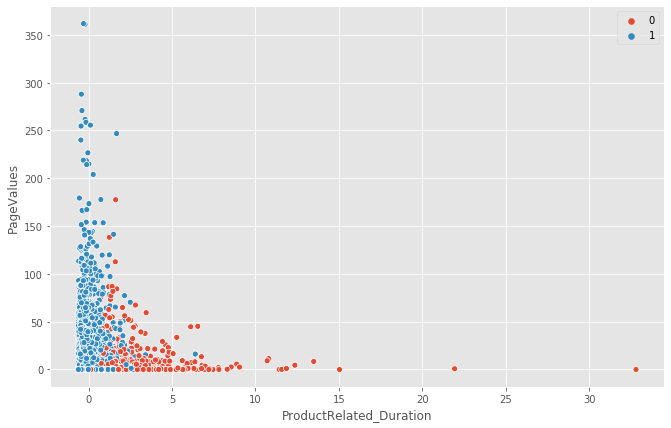

In [7]:
plt.figure(figsize = (11,7)) 
sns.scatterplot(data.ProductRelated_Duration, data.PageValues, hue = cluster.labels_); 

<span style="font-family: monospace; font-weight:400; font-size:100%;color:#3e252d;">Administrative Duration VS Bounce Rates 

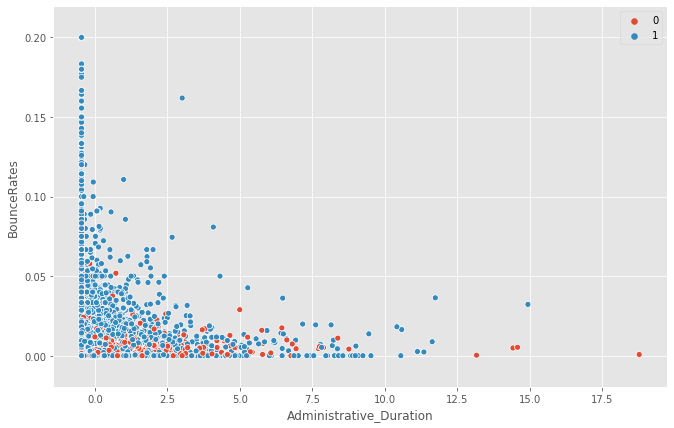

In [8]:
plt.figure(figsize = (11,7)) 
sns.scatterplot(data.Administrative_Duration, data.BounceRates, hue = cluster.labels_); 

<span style="font-family: monospace; font-weight:400; font-size:100%;color:#3e252d;">Informational Duration VS Bounce Rates 

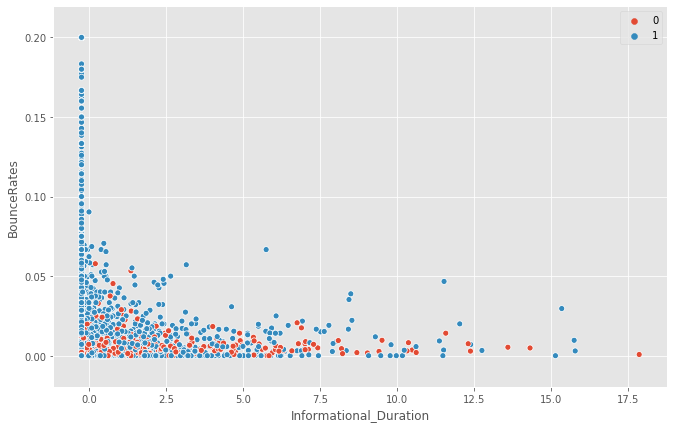

In [9]:
plt.figure(figsize = (11,7)) 
sns.scatterplot(data.Informational_Duration, data.BounceRates, hue = cluster.labels_);  

<span style="font-family: monospace; font-weight:400; font-size:100%;color:#3e252d;">Product Related Duration VS Bounce Rates 

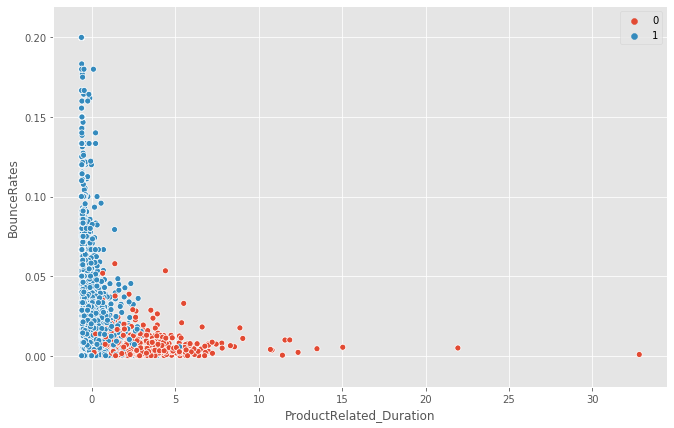

In [10]:
plt.figure(figsize = (11,7)) 
sns.scatterplot(data.ProductRelated_Duration, data.BounceRates, hue = cluster.labels_); 

<span style="font-family: monospace; font-weight:400; font-size:100%;color:#3e252d;">Administrative Duration VS Exit Rates

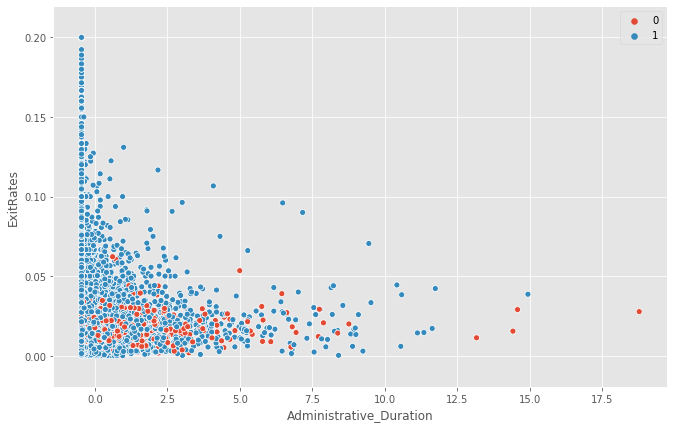

In [11]:
plt.figure(figsize = (11,7)) 
sns.scatterplot(data.Administrative_Duration, data.ExitRates, hue = cluster.labels_); 

<span style="font-family: monospace; font-weight:400; font-size:100%;color:#3e252d;">Informational Duration VS Exit Rates 

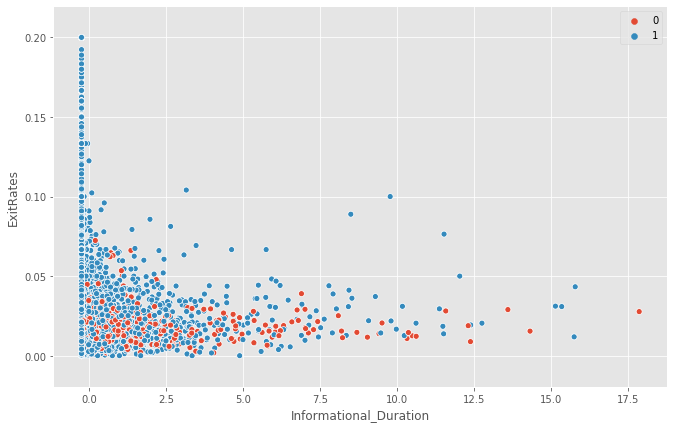

In [12]:
plt.figure(figsize = (11,7)) 
sns.scatterplot(data.Informational_Duration, data.ExitRates, hue = cluster.labels_); 

<span style="font-family: monospace; font-weight:400; font-size:100%;color:#3e252d;">Product Related Duration VS Exit Rates

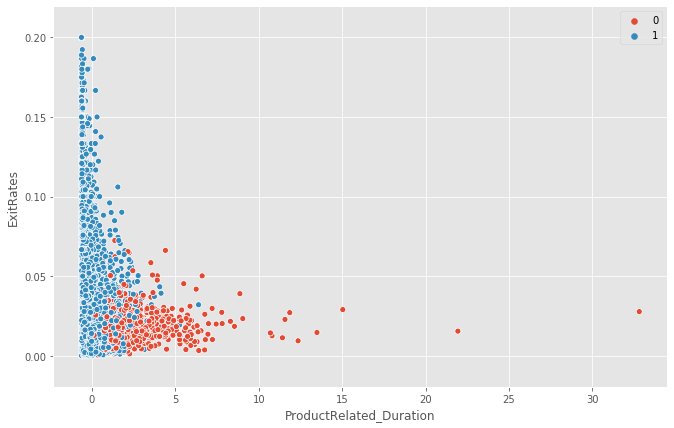

In [13]:
plt.figure(figsize = (11,7)) 
sns.scatterplot(data.ProductRelated_Duration, data.ExitRates, hue = cluster.labels_); 